   id  age_group        bpm         ibi       sdnn                sdsd  \
0   1        2.0  70.037869  856.679412  57.488005   34.19853757699058   
1   2        2.0  65.714994  913.033639  72.727984   44.26448137095001   
2   3        7.0  92.793134  646.599567   5.100488    3.17485290181902   
3   4        4.0  62.725756  956.544872  53.731985  21.058419113018463   
4   5        2.0  65.202563  920.209231  77.232512   76.29787619723439   

        rmssd     pnn20     pnn50  hr_mad        sd1        sd2             s  \
0   54.744040  0.717718  0.339339    37.0  38.708972  70.686493   8596.030375   
1   76.399539  0.815951  0.542945    51.0  54.020855  87.350129  14824.323420   
2    5.902681  0.002169  0.000000     4.0   4.173735   5.847433     76.672565   
3   35.210072  0.604502  0.160772    32.0  24.895979  71.740909   5611.073440   
4  113.081529  0.885802  0.654321    47.0  79.960673  74.607935  18741.801455   

    sd1/sd2  breathingrate error  
0  0.547615       0.133333   NaN 

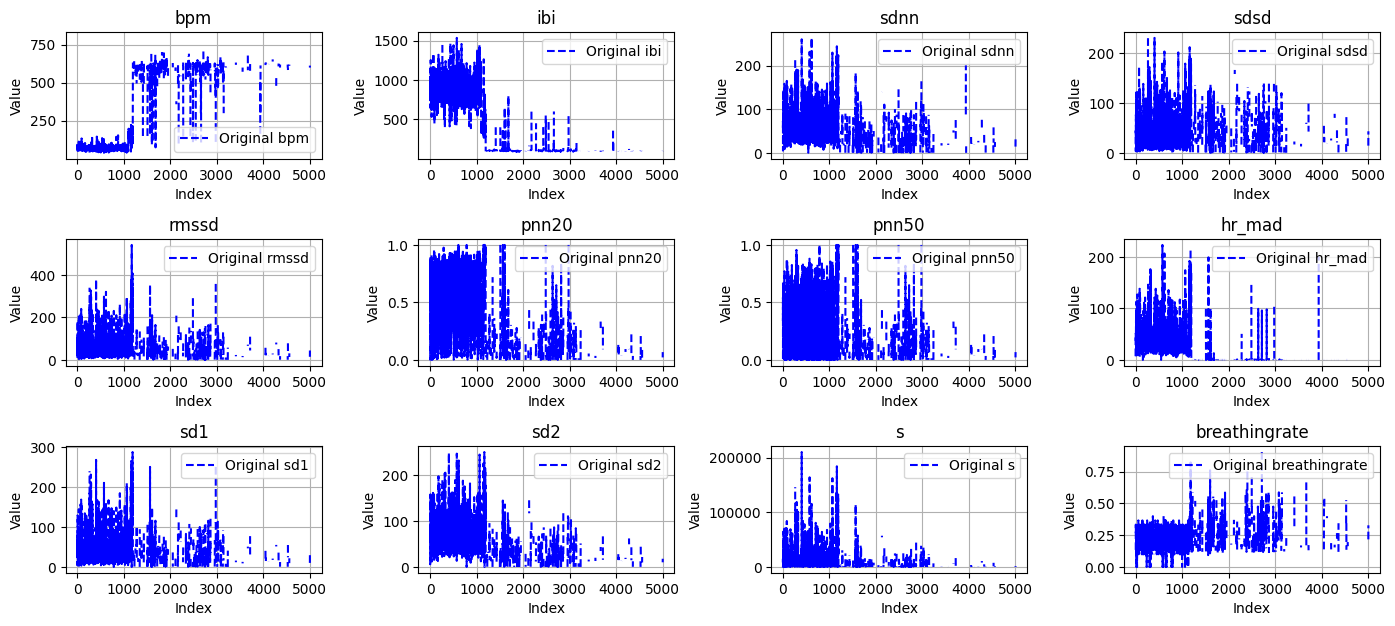

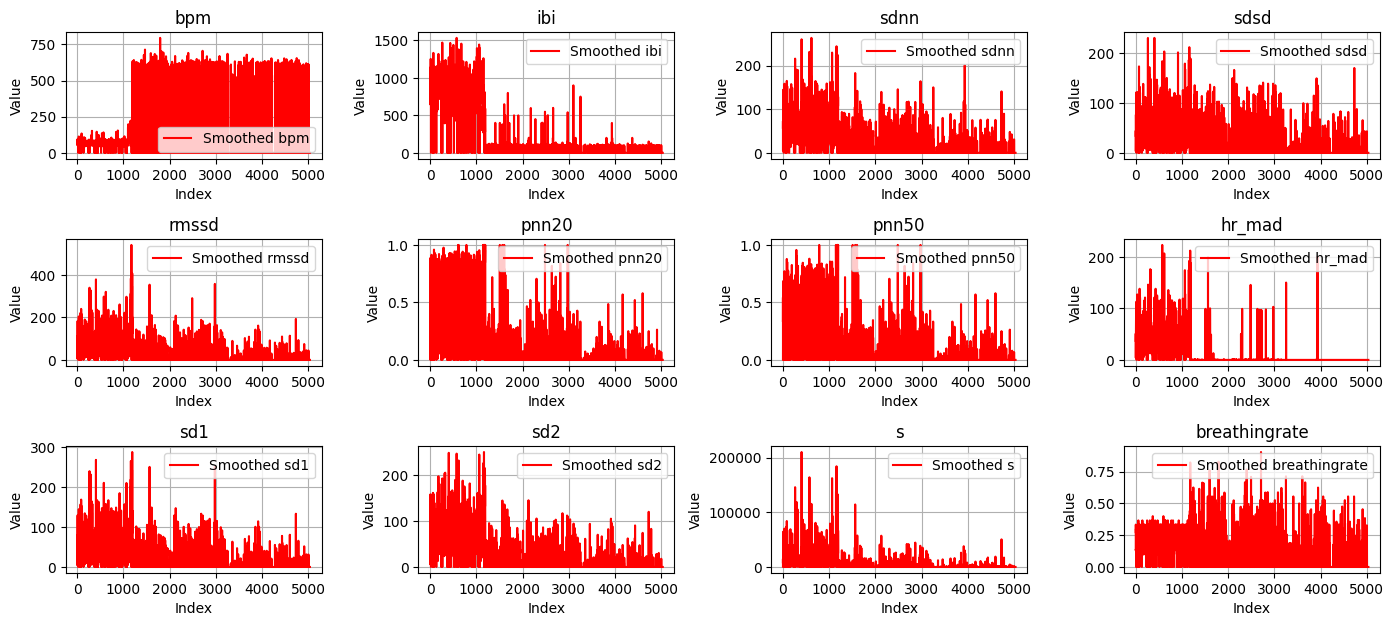

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

csv_path = "D:/CK/dataset.csv"  
data = pd.read_csv(csv_path)

print(data.head())

def smooth_data(series, window_length=3, polyorder=2):
    if len(series) < window_length:
        window_length = len(series) // 2 * 2 + 1  # window_length нечётное и меньше или равно длине данных(хз,как оно там по сути)

    series = pd.to_numeric(series, errors='coerce')
    
    if np.isnan(series).any():
        print(f"Warning: missing values detected in series. Replacing with 0.")
        series = np.nan_to_num(series, nan=0)
    
    try:
        return savgol_filter(series, window_length=window_length, polyorder=polyorder)
    except ValueError as e:
        print(f"Error: {e}")
        return series 

columns_to_smooth = ['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'breathingrate']
smoothed_data = {}

for col in columns_to_smooth:
    smoothed_data[col] = smooth_data(data[col].values)

fig1 = plt.figure(figsize=(14, 8))
fig2 = plt.figure(figsize=(14, 8))

for i, col in enumerate(columns_to_smooth, 1):
    ax1 = fig1.add_subplot(4, 4, i)
    ax1.plot(pd.to_numeric(data[col], errors='coerce'), label=f'Original {col}', color='blue', linestyle='--')
    ax1.set_title(col)
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Value')
    ax1.legend()
    ax1.grid(True)

    ax2 = fig2.add_subplot(4, 4, i)
    ax2.plot(smoothed_data[col], label=f'Smoothed {col}', color='red')
    ax2.set_title(col)
    ax2.set_xlabel('Index')
    ax2.set_ylabel('Value')
    ax2.legend()
    ax2.grid(True)

fig1.tight_layout()
fig2.tight_layout()

plt.show()

idk what should be done:
bpm: 0    70.037869
1    67.876431
2    76.181999
3    73.744628
4    73.573817
dtype: float64
ibi: 0    856.679412
1    884.856525
2    805.437539
3    838.726026
4    841.117890
dtype: float64
sdnn: 0    57.488005
1    65.107995
2    45.105493
3    43.853486
4    45.354995
dtype: float64
sdsd: 0    34.198538
1    39.231509
2    27.212624
3    22.832584
4    33.510383
dtype: float64
rmssd: 0    54.744040
1    65.571790
2    45.682087
3    39.170764
4    51.398094
dtype: float64
pnn20: 0    0.717718
1    0.766834
2    0.511946
3    0.474207
4    0.497491
dtype: float64
pnn50: 0    0.339339
1    0.441142
2    0.294095
3    0.234572
4    0.271698
dtype: float64
hr_mad: 0    37.000000
1    44.000000
2    30.666667
3    29.000000
4    27.666667
dtype: float64
sd1: 0    38.708972
1    46.364914
2    32.301187
3    27.696856
4    36.343462
dtype: float64
sd2: 0    70.686493
1    79.018311
2    54.628018
3    54.979491
4    50.732093
dtype: float64
s: 0     8596.03037

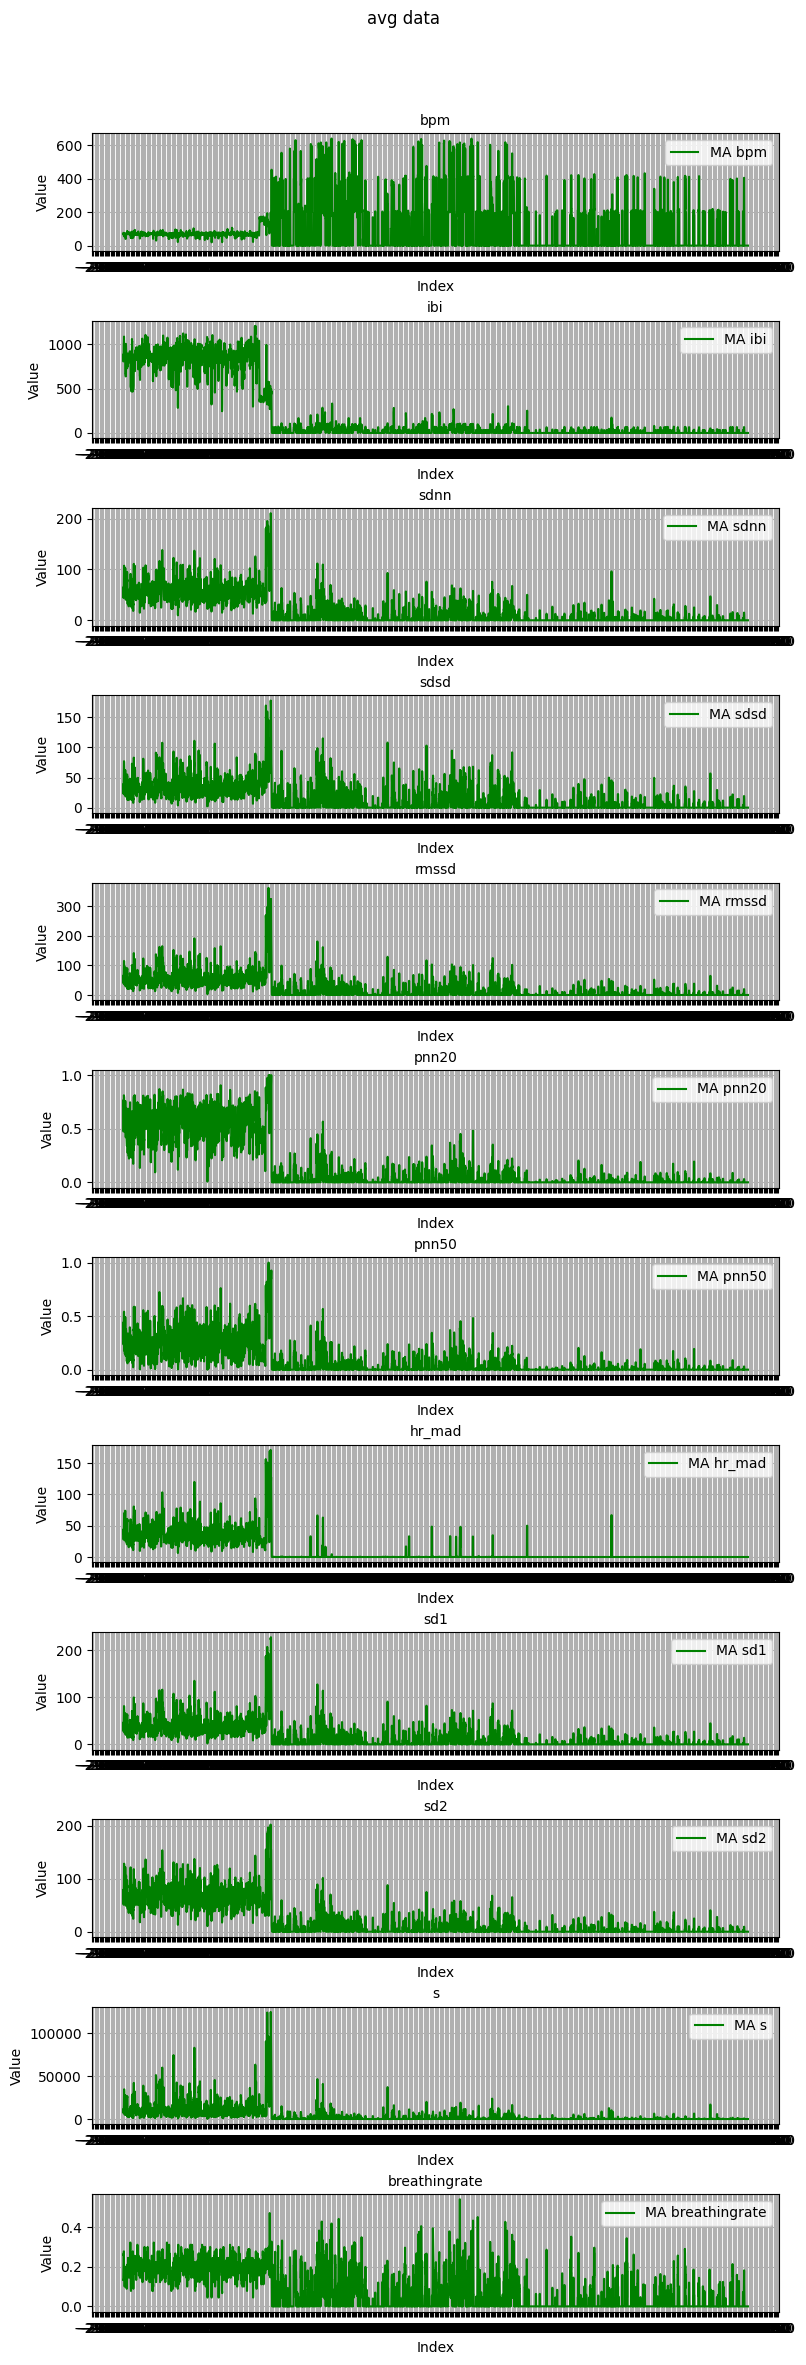

In [18]:
from matplotlib.ticker import MultipleLocator


def moving_average(series, window_size=3):
    return pd.Series(series).rolling(window=window_size, min_periods=1).mean()

ma_data = {}
for col in columns_to_smooth:
    ma_data[col] = moving_average(smoothed_data[col])

print("idk what should be done:")
for col, values in ma_data.items():
    print(f"{col}: {values[:5]}")

fig, axes = plt.subplots(len(columns_to_smooth), 1, figsize=(8, 2 * len(columns_to_smooth)))
fig.suptitle("avg data", fontsize=12)

for i, col in enumerate(columns_to_smooth):
    ax = axes[i] if len(columns_to_smooth) > 1 else axes
    ax.plot(ma_data[col], label=f'MA {col}', color='green', linestyle='-', marker=None)
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('Index', fontsize=10)
    ax.set_ylabel('Value', fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(True)
    ax.xaxis.set_major_locator(MultipleLocator(10))

plt.tight_layout(rect=[0, 0, 1, 0.95], pad=0.5)
plt.show()



bpm: [31.19802991 30.13616944 29.09747414 28.1051695  26.70661184]
ibi: [768.1460177  782.6809866  797.19349851 811.3858511  831.07757745]
sdnn: [29.31434445 32.78334533 36.28939523 39.76714342 44.49954968]
sdsd: [12.92807545 15.98207784 19.04995536 22.07018819 26.24254943]
rmssd: [ 4.92196994  8.95230588 12.99774907 16.97681468 22.47500964]
pnn20: [0.52224522 0.52839324 0.34473588 0.53103181 0.52211028]
pnn50: [0.18508415 0.19583508 0.20608385 0.21556302 0.22932727]
hr_mad: [ 7.18693269  8.98000864 10.7846503  12.56715611 14.98652949]
sd1: [ 3.78538302  6.6356983   9.49672715 12.31084555 16.19929527]
sd2: [39.79342639 44.80961861 48.66398303 51.13852269 54.45867114]
s: [0. 0. 0. 0. 0.]
breathingrate: [0.12015361 0.11711532 0.1138627  0.11040822 0.10634043]


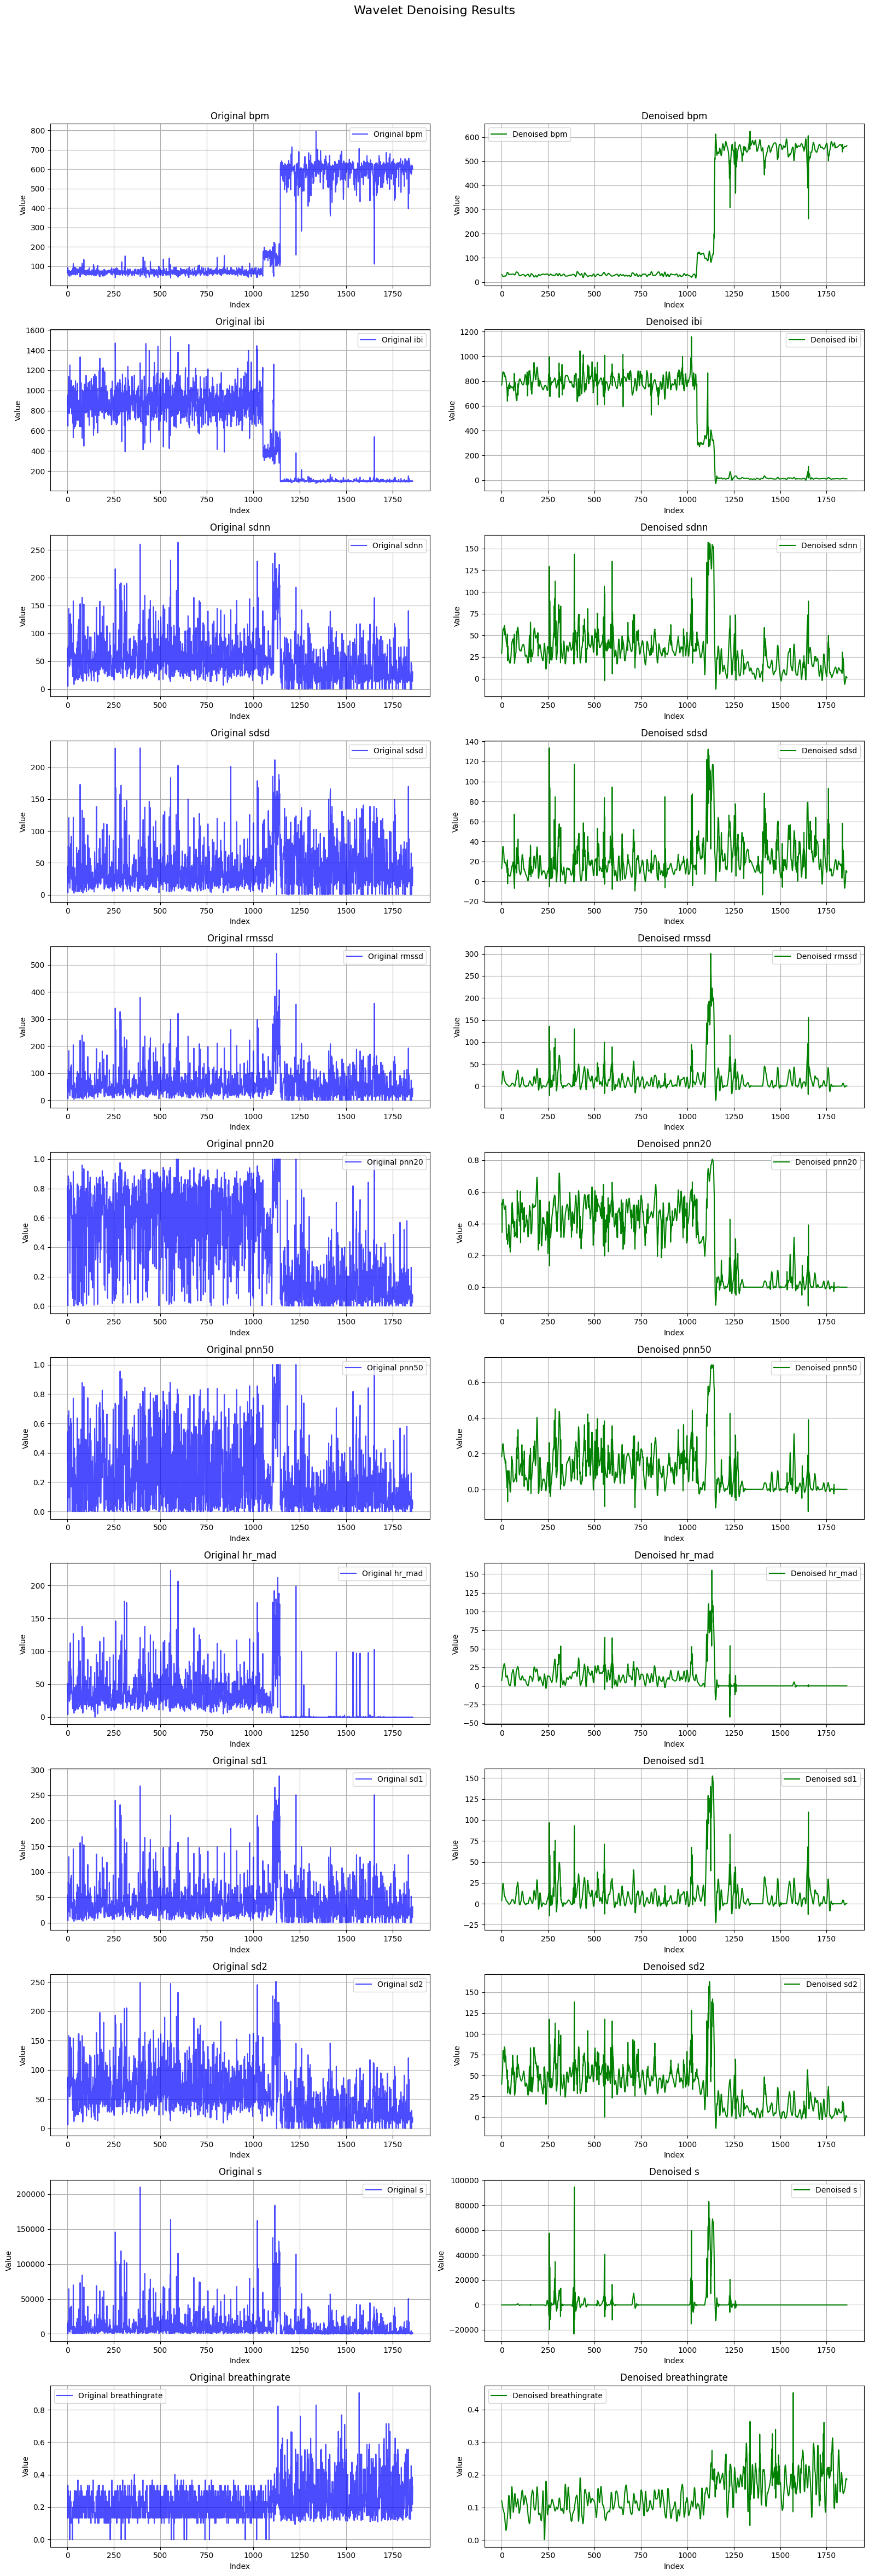

In [28]:
import pywt
import pandas as pd
import numpy as np

def wavelet_denoising(series, wavelet='db4', level=3):
    coeffs = pywt.wavedec(series, wavelet, level=level)
    threshold = 0.5 * np.nanmax(coeffs[-1])
    coeffs_thresh = [pywt.threshold(c, threshold, mode='soft') for c in coeffs]
    denoised_series = pywt.waverec(coeffs_thresh, wavelet)
    return denoised_series

columns_to_smooth = ['bpm', 'ibi', 'sdnn', 'sdsd', 'rmssd', 'pnn20', 'pnn50', 'hr_mad', 'sd1', 'sd2', 's', 'breathingrate']

for col in columns_to_smooth:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')  

data = data.dropna(subset=columns_to_smooth)  

wavelet_data = {}
for col in columns_to_smooth:
    if col in data.columns:
        if len(data[col].values) > 0:
            wavelet_data[col] = wavelet_denoising(data[col].values)
        else:
            continue

for col, values in wavelet_data.items():
    print(f"{col}: {values[:5]}")


fig, axes = plt.subplots(len(columns_to_smooth), 2, figsize=(16, 4 * len(columns_to_smooth)))
fig.suptitle("Wavelet Denoising Results", fontsize=16)

for i, col in enumerate(columns_to_smooth):
    if col in wavelet_data and col in data.columns:
        original_series = data[col].values
        
        denoised_series = wavelet_data[col]
        
        ax1 = axes[i][0] if len(columns_to_smooth) > 1 else axes[0]
        ax1.plot(original_series, label=f'Original {col}', color='blue', alpha=0.7)
        ax1.set_title(f"Original {col}")
        ax1.set_xlabel('Index')
        ax1.set_ylabel('Value')
        ax1.legend()
        ax1.grid(True)
        
        ax2 = axes[i][1] if len(columns_to_smooth) > 1 else axes[1]
        ax2.plot(denoised_series, label=f'Denoised {col}', color='green')
        ax2.set_title(f"Denoised {col}")
        ax2.set_xlabel('Index')
        ax2.set_ylabel('Value')
        ax2.legend()
        ax2.grid(True)

# Настройка макета и отображение графиков
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

bpm: 0    70.037869
1    67.876431
2    76.181999
3    73.744628
4    73.573817
dtype: float64
ibi: 0    856.679412
1    884.856525
2    805.437539
3    838.726026
4    841.117890
dtype: float64
sdnn: 0    57.488005
1    65.107995
2    45.105493
3    43.853486
4    45.354995
dtype: float64
sdsd: 0    34.198538
1    39.231509
2    27.212624
3    22.832584
4    33.510383
dtype: float64
rmssd: 0    54.744040
1    65.571790
2    45.682087
3    39.170764
4    51.398094
dtype: float64
pnn20: 0    0.717718
1    0.766834
2    0.511946
3    0.474207
4    0.497491
dtype: float64
pnn50: 0    0.339339
1    0.441142
2    0.294095
3    0.234572
4    0.271698
dtype: float64
hr_mad: 0    37.000000
1    44.000000
2    30.666667
3    29.000000
4    27.666667
dtype: float64
sd1: 0    38.708972
1    46.364914
2    32.301187
3    27.696856
4    36.343462
dtype: float64
sd2: 0    70.686493
1    79.018311
2    54.628018
3    54.979491
4    50.732093
dtype: float64
s: 0     8596.030375
1    11710.176898
2    

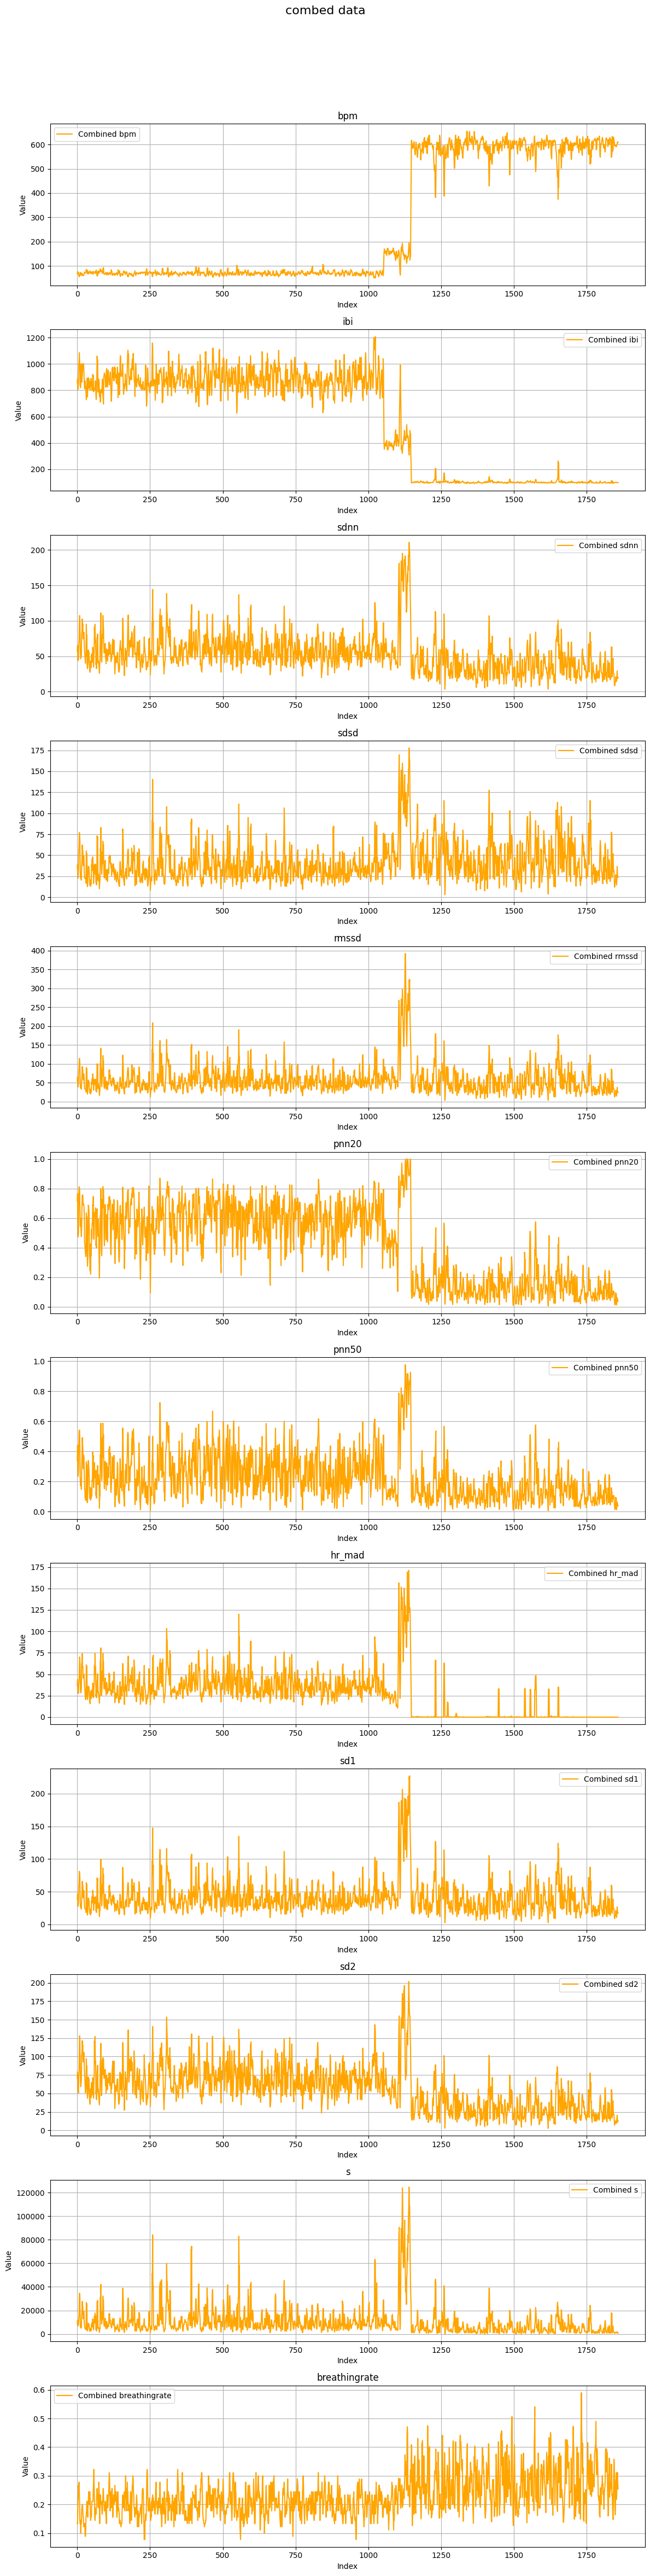

In [29]:
def combined_smoothing(series, window_length=3, polyorder=2, ma_window=3):
    smoothed = savgol_filter(series, window_length=window_length, polyorder=polyorder)
    return moving_average(smoothed, window_size=ma_window)

combined_data = {}
for col in columns_to_smooth:
    combined_data[col] = combined_smoothing(data[col].values)

for col, values in combined_data.items():
    print(f"{col}: {values[:5]}")

fig, axes = plt.subplots(len(columns_to_smooth), 1, figsize=(12, 4 * len(columns_to_smooth)))
fig.suptitle("combed data", fontsize=16)

for i, col in enumerate(columns_to_smooth):
    ax = axes[i] if len(columns_to_smooth) > 1 else axes
    ax.plot(combined_data[col], label=f'Combined {col}', color='orange')
    ax.set_title(col)
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')
    ax.legend()
    ax.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

peaks: [1148, 1153, 1155, 1157, 1164, 1172, 1176, 1183, 1186, 1193, 1199, 1202, 1204, 1206, 1208, 1210, 1216, 1223, 1228, 1234, 1236, 1241, 1245, 1250, 1252, 1255, 1258, 1263, 1271, 1278, 1280, 1286, 1290, 1292, 1294, 1300, 1302, 1304, 1310, 1314, 1321, 1328, 1331, 1333, 1335, 1338, 1340, 1348, 1351, 1353, 1356, 1364, 1370, 1372, 1374, 1379, 1381, 1388, 1392, 1395, 1400, 1404, 1409, 1411, 1413, 1418, 1420, 1422, 1429, 1434, 1436, 1439, 1441, 1444, 1446, 1450, 1454, 1462, 1464, 1471, 1477, 1481, 1483, 1489, 1491, 1496, 1501, 1505, 1507, 1510, 1515, 1517, 1519, 1524, 1531, 1533, 1535, 1540, 1544, 1546, 1548, 1551, 1554, 1560, 1562, 1571, 1578, 1583, 1585, 1589, 1592, 1596, 1600, 1606, 1613, 1617, 1623, 1626, 1632, 1637, 1640, 1642, 1651, 1653, 1655, 1657, 1660, 1666, 1672, 1677, 1679, 1681, 1686, 1690, 1695, 1700, 1702, 1704, 1706, 1710, 1718, 1721, 1727, 1732, 1737, 1742, 1747, 1754, 1759, 1761, 1763, 1765, 1769, 1780, 1782, 1784, 1787, 1791, 1794, 1799, 1804, 1806, 1811, 1817, 1826, 18

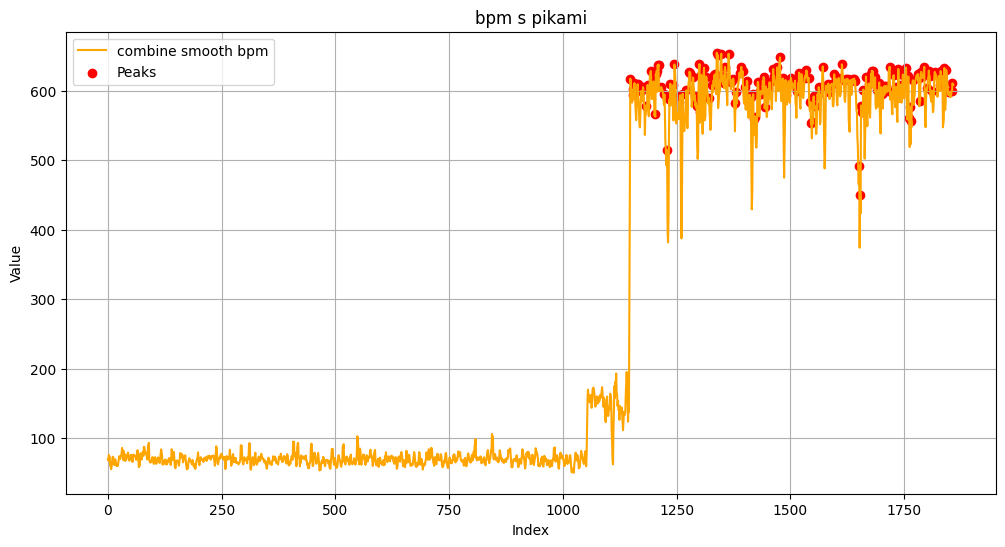

In [31]:
def detect_peaks(series, threshold=0.5):
    peaks = []
    for i in range(1, len(series) - 1):
        if series[i] > series[i - 1] and series[i] > series[i + 1] and series[i] > threshold:
            peaks.append(i)
    return peaks

bpm_values = combined_data['bpm']
bpm_peaks = detect_peaks(bpm_values, threshold=np.mean(bpm_values))

print(f"peaks: {bpm_peaks}")

plt.figure(figsize=(12, 6))
plt.plot(bpm_values, label='combine smooth bpm', color='orange')
plt.scatter(bpm_peaks, [bpm_values[p] for p in bpm_peaks], color='red', label='Peaks')
plt.title('bpm s pikami')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()